In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('b_p_t_complete.csv')
df.head()

,answer,in_text,in_image,in_speaker,other
0,1,0.125,0.056,0.122,0.698
1,1,0.302,0.032,0.157,0.511
2,1,0.223,0.008,0.134,0.637
3,0,0.320,0.018,0.044,0.620
4,0,0.047,0.009,0.157,0.789


In [27]:
len(df)

216

In [28]:
y = df['answer'].tolist()
x = df[['in_text','in_image', 'in_speaker', 'other']]

In [29]:
df.head()

,answer,in_text,in_image,in_speaker,other
0,1,0.125,0.056,0.122,0.698
1,1,0.302,0.032,0.157,0.511
2,1,0.223,0.008,0.134,0.637
3,0,0.320,0.018,0.044,0.620
4,0,0.047,0.009,0.157,0.789


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [31]:
x_train[0:2]

,in_text,in_image,in_speaker,other
94,0.335,0.099,0.391,0.178
93,0.113,0.021,0.551,0.317


### Gradient Boosting Regressor Model

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train,np.array((y_train)))
predictions = gbr_model.predict(x_test)
#acc = accuracy_score(y_test, predictions)
print('mse' , mean_squared_error(y_test,predictions))
print('mae', mean_absolute_error(y_test,predictions))
#print('accuracy', acc)

mse 0.3147366719573861
mae 0.45877927419156617


### Plotting correlations

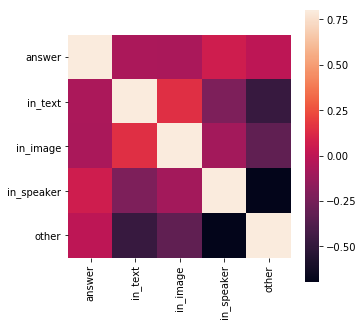

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('b_p_t_complete.csv')
C_mat = df.corr()
fig = plt.figure(figsize = (5,5))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

### 4 layer Neural Network

In [10]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
#NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='sigmoid'))
#NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='sigmoid'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [11]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [12]:
NN_model.fit(x, y, epochs=200, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Train on 172 samples, validate on 44 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 0.5929 - mean_absolute_error: 0.6530 - val_loss: 0.4534 - val_mean_absolute_error: 0.5673

Epoch 00001: val_loss improved from inf to 0.45339, saving model to Weights-001--0.45339.hdf5
Epoch 2/200
172/172 [==============================] - 0s 52us/step - loss: 0.4822 - mean_absolute_error: 0.6167 - val_loss: 0.3702 - val_mean_absolute_error: 0.5489

Epoch 00002: val_loss improved from 0.45339 to 0.37022, saving model to Weights-002--0.37022.hdf5
Epoch 3/200
172/172 [==============================] - 0s 53us/step - loss: 0.3868 - mean_absolute_error: 0.5807 - val_loss: 0.3075 - val_mean_absolute_error: 0.5304

Epoch 00003: val_loss improved from 0.37022 to 0.30746, saving model to Weights-003--0.30746.hdf5
Epoch 4/200
172/172 [==============================] - 0s 63us/step - loss: 0.3157 - mean_absolute_error: 0.5473 - val_loss: 0.2667 - val_mean_absolute_error: 0.5125

172/172 [==============================] - 0s 48us/step - loss: 0.2189 - mean_absolute_error: 0.4385 - val_loss: 0.2495 - val_mean_absolute_error: 0.4690

Epoch 00037: val_loss did not improve from 0.24307
Epoch 38/200
172/172 [==============================] - 0s 45us/step - loss: 0.2189 - mean_absolute_error: 0.4377 - val_loss: 0.2497 - val_mean_absolute_error: 0.4686

Epoch 00038: val_loss did not improve from 0.24307
Epoch 39/200
172/172 [==============================] - 0s 49us/step - loss: 0.2188 - mean_absolute_error: 0.4371 - val_loss: 0.2500 - val_mean_absolute_error: 0.4683

Epoch 00039: val_loss did not improve from 0.24307
Epoch 40/200
172/172 [==============================] - 0s 46us/step - loss: 0.2190 - mean_absolute_error: 0.4361 - val_loss: 0.2506 - val_mean_absolute_error: 0.4677

Epoch 00040: val_loss did not improve from 0.24307
Epoch 41/200
172/172 [==============================] - 0s 48us/step - loss: 0.2189 - mean_absolute_error: 0.4357 - val_loss: 0.2502 - va

172/172 [==============================] - 0s 46us/step - loss: 0.2176 - mean_absolute_error: 0.4377 - val_loss: 0.2486 - val_mean_absolute_error: 0.4690

Epoch 00074: val_loss did not improve from 0.24307
Epoch 75/200
172/172 [==============================] - 0s 47us/step - loss: 0.2175 - mean_absolute_error: 0.4381 - val_loss: 0.2490 - val_mean_absolute_error: 0.4686

Epoch 00075: val_loss did not improve from 0.24307
Epoch 76/200
172/172 [==============================] - 0s 47us/step - loss: 0.2175 - mean_absolute_error: 0.4379 - val_loss: 0.2490 - val_mean_absolute_error: 0.4684

Epoch 00076: val_loss did not improve from 0.24307
Epoch 77/200
172/172 [==============================] - 0s 44us/step - loss: 0.2174 - mean_absolute_error: 0.4372 - val_loss: 0.2497 - val_mean_absolute_error: 0.4677

Epoch 00077: val_loss did not improve from 0.24307
Epoch 78/200
172/172 [==============================] - 0s 48us/step - loss: 0.2174 - mean_absolute_error: 0.4354 - val_loss: 0.2507 - va

172/172 [==============================] - 0s 46us/step - loss: 0.2161 - mean_absolute_error: 0.4335 - val_loss: 0.2509 - val_mean_absolute_error: 0.4664

Epoch 00111: val_loss did not improve from 0.24307
Epoch 112/200
172/172 [==============================] - 0s 47us/step - loss: 0.2160 - mean_absolute_error: 0.4333 - val_loss: 0.2515 - val_mean_absolute_error: 0.4657

Epoch 00112: val_loss did not improve from 0.24307
Epoch 113/200
172/172 [==============================] - 0s 45us/step - loss: 0.2161 - mean_absolute_error: 0.4314 - val_loss: 0.2521 - val_mean_absolute_error: 0.4651

Epoch 00113: val_loss did not improve from 0.24307
Epoch 114/200
172/172 [==============================] - 0s 45us/step - loss: 0.2158 - mean_absolute_error: 0.4313 - val_loss: 0.2513 - val_mean_absolute_error: 0.4660

Epoch 00114: val_loss did not improve from 0.24307
Epoch 115/200
172/172 [==============================] - 0s 47us/step - loss: 0.2160 - mean_absolute_error: 0.4337 - val_loss: 0.2501 

172/172 [==============================] - 0s 47us/step - loss: 0.2148 - mean_absolute_error: 0.4358 - val_loss: 0.2503 - val_mean_absolute_error: 0.4671

Epoch 00148: val_loss did not improve from 0.24307
Epoch 149/200
172/172 [==============================] - 0s 47us/step - loss: 0.2148 - mean_absolute_error: 0.4340 - val_loss: 0.2513 - val_mean_absolute_error: 0.4659

Epoch 00149: val_loss did not improve from 0.24307
Epoch 150/200
172/172 [==============================] - 0s 48us/step - loss: 0.2144 - mean_absolute_error: 0.4312 - val_loss: 0.2532 - val_mean_absolute_error: 0.4639

Epoch 00150: val_loss did not improve from 0.24307
Epoch 151/200
172/172 [==============================] - 0s 48us/step - loss: 0.2145 - mean_absolute_error: 0.4285 - val_loss: 0.2542 - val_mean_absolute_error: 0.4630

Epoch 00151: val_loss did not improve from 0.24307
Epoch 152/200
172/172 [==============================] - 0s 46us/step - loss: 0.2145 - mean_absolute_error: 0.4262 - val_loss: 0.2554 

172/172 [==============================] - 0s 1ms/step - loss: 0.2133 - mean_absolute_error: 0.4248 - val_loss: 0.2536 - val_mean_absolute_error: 0.4639

Epoch 00185: val_loss did not improve from 0.24307
Epoch 186/200
172/172 [==============================] - 0s 49us/step - loss: 0.2134 - mean_absolute_error: 0.4288 - val_loss: 0.2519 - val_mean_absolute_error: 0.4655

Epoch 00186: val_loss did not improve from 0.24307
Epoch 187/200
172/172 [==============================] - 0s 47us/step - loss: 0.2136 - mean_absolute_error: 0.4320 - val_loss: 0.2507 - val_mean_absolute_error: 0.4667

Epoch 00187: val_loss did not improve from 0.24307
Epoch 188/200
172/172 [==============================] - 0s 47us/step - loss: 0.2133 - mean_absolute_error: 0.4319 - val_loss: 0.2523 - val_mean_absolute_error: 0.4646

Epoch 00188: val_loss did not improve from 0.24307
Epoch 189/200
172/172 [==============================] - 0s 46us/step - loss: 0.2133 - mean_absolute_error: 0.4285 - val_loss: 0.2532 -

### SVR

In [39]:
from sklearn.svm import SVR
clf = SVR(gamma=0.01, C=1000.0, epsilon=0.2,kernel = 'poly',)
clf.fit(x_train, np.array((y_train))) 
y_pred = clf.predict(x_test)
print('mse', mean_squared_error(y_test,y_pred))
print('mae', mean_absolute_error(y_test,y_pred))

mse 0.2718027435161949
mae 0.4318223707898294


In [14]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(kernel = 'poly')
clf.fit(x_train, np.array((y_train))) 
y_pred = clf.predict(x_test)
print('mse', mean_squared_error(y_test,y_pred))
print('mae', mean_absolute_error(y_test,y_pred))

mse 0.2299426811209386
mae 0.453799265292043


### PCA 

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR

poly = PolynomialFeatures(interaction_only=True)
x = poly.fit_transform(x)
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(x)

In [16]:
svr = LinearSVR()
svr.fit(x_train,np.array((y_train)))
y_pred = svr.predict(x_test)
print('mse', mean_squared_error(y_test,y_pred))
print('mae', mean_absolute_error(y_test,y_pred))

mse 0.36364310892389
mae 0.36369371773465625


### 2 Layer Neural Network

In [42]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


# The Input Layer :
model = Sequential()
#model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# Compile the network :
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [43]:
model.fit(x, y, epochs=200, batch_size=64, validation_split = 0.3, callbacks=callbacks_list)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=     in_text  in_image  in_speaker  other
0      0.125     0.056       0.122  0.698
1      0.302     0.032       0.157  0.511
2      0.223     0.008       0.134  0.637
3      0.320     0.018       0.044  0.620
4      0.047     0.009       0.157  0.789
5      0.206     0.046       0.031  0.719
6      0.254     0.043       0.159  0.546
7      0.235     0.104       0.188  0.475
8      0.157     0.044       0.223  0.578
9      0.238     0.056       0.146  0.563
10     0.116     0.011       0.072  0.804
11     0.242     0.024       0.113  0.623
12     0.180     0.014       0.265  0.543
13     0.137     0.006       0.248  0.611
14     0.195     0.013       0.114  0.680
15     0.163     0.020       0.178  0.641
16     0.299     0.005       0.246  0.453
17     0.175     0.046       0.427  0.354
18     0.180     0.000       0.088  0.733
19     0.207     0.042       0.383  0.370
20     0.311     0.053       0.360  0.278
21     0.142     0.153       0.255  0.451
22     0.260     0.000       0.199  0.542
23     0.509     0.042       0.190  0.260
24     0.151     0.021       0.236  0.595
25     0.291     0.039       0.129  0.543
26     0.067     0.000       0.566  0.368
27     0.249     0.000       0.086  0.667
28     0.142     0.016       0.233  0.611
29     0.112     0.019       0.097  0.774
..       ...       ...         ...    ...
186    0.243     0.109       0.291  0.359
187    0.030     0.036       0.347  0.589
188    0.080     0.055       0.413  0.454
189    0.144     0.043       0.433  0.382
190    0.064     0.034       0.380  0.524
191    0.387     0.013       0.228  0.374
192    0.390     0.088       0.236  0.289
193    0.042     0.036       0.643  0.281
194    0.151     0.016       0.356  0.479
195    0.385     0.075       0.227  0.316
196    0.357     0.058       0.071  0.516
197    0.248     0.257       0.320  0.176
198    0.232     0.233       0.305  0.233
199    0.124     0.140       0.567  0.171
200    0.277     0.093       0.129  0.503
201    0.033     0.010       0.246  0.713
202    0.242     0.059       0.121  0.581
203    0.144     0.191       0.516  0.151
204    0.147     0.092       0.338  0.425
205    0.238     0.071       0.189  0.504
206    0.164     0.074       0.286  0.478
207    0.010     0.041       0.432  0.519
208    0.135     0.139       0.155  0.572
209    0.206     0.017       0.112  0.666
210    0.099     0.032       0.202  0.669
211    0.068     0.020       0.619  0.295
212    0.102     0.087       0.484  0.329
213    0.041     0.089       0.704  0.168
214    0.144     0.009       0.133  0.715
215    0.507     0.056       0.066  0.373

[216 rows x 4 columns]

In [44]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='sigmoid'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='sigmoid'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(x, y, epochs=200, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_11 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 239,233
Trainable params: 239,233
Non-trainable params: 0
_________________________________________________________________
Trai

172/172 [==============================] - 0s 160us/step - loss: 0.2195 - mean_absolute_error: 0.4375 - val_loss: 0.2484 - val_mean_absolute_error: 0.4685

Epoch 00033: val_loss did not improve from 0.23032
Epoch 34/200
172/172 [==============================] - 0s 164us/step - loss: 0.2193 - mean_absolute_error: 0.4402 - val_loss: 0.2479 - val_mean_absolute_error: 0.4690

Epoch 00034: val_loss did not improve from 0.23032
Epoch 35/200
172/172 [==============================] - 0s 154us/step - loss: 0.2192 - mean_absolute_error: 0.4401 - val_loss: 0.2485 - val_mean_absolute_error: 0.4682

Epoch 00035: val_loss did not improve from 0.23032
Epoch 36/200
172/172 [==============================] - 0s 165us/step - loss: 0.2198 - mean_absolute_error: 0.4374 - val_loss: 0.2505 - val_mean_absolute_error: 0.4661

Epoch 00036: val_loss did not improve from 0.23032
Epoch 37/200
172/172 [==============================] - 0s 167us/step - loss: 0.2192 - mean_absolute_error: 0.4366 - val_loss: 0.2484

172/172 [==============================] - 0s 161us/step - loss: 0.2119 - mean_absolute_error: 0.4338 - val_loss: 0.2511 - val_mean_absolute_error: 0.4611

Epoch 00070: val_loss did not improve from 0.23032
Epoch 71/200
172/172 [==============================] - 0s 170us/step - loss: 0.2111 - mean_absolute_error: 0.4225 - val_loss: 0.2558 - val_mean_absolute_error: 0.4561

Epoch 00071: val_loss did not improve from 0.23032
Epoch 72/200
172/172 [==============================] - 0s 158us/step - loss: 0.2125 - mean_absolute_error: 0.4151 - val_loss: 0.2575 - val_mean_absolute_error: 0.4554

Epoch 00072: val_loss did not improve from 0.23032
Epoch 73/200
172/172 [==============================] - 0s 164us/step - loss: 0.2113 - mean_absolute_error: 0.4165 - val_loss: 0.2538 - val_mean_absolute_error: 0.4597

Epoch 00073: val_loss did not improve from 0.23032
Epoch 74/200
172/172 [==============================] - 0s 161us/step - loss: 0.2120 - mean_absolute_error: 0.4243 - val_loss: 0.2517

172/172 [==============================] - 0s 160us/step - loss: 0.2025 - mean_absolute_error: 0.4070 - val_loss: 0.2581 - val_mean_absolute_error: 0.4499

Epoch 00107: val_loss did not improve from 0.23032
Epoch 108/200
172/172 [==============================] - 0s 160us/step - loss: 0.2013 - mean_absolute_error: 0.4053 - val_loss: 0.2543 - val_mean_absolute_error: 0.4539

Epoch 00108: val_loss did not improve from 0.23032
Epoch 109/200
172/172 [==============================] - 0s 158us/step - loss: 0.2021 - mean_absolute_error: 0.4162 - val_loss: 0.2551 - val_mean_absolute_error: 0.4539

Epoch 00109: val_loss did not improve from 0.23032
Epoch 110/200
172/172 [==============================] - 0s 172us/step - loss: 0.2010 - mean_absolute_error: 0.4068 - val_loss: 0.2650 - val_mean_absolute_error: 0.4444

Epoch 00110: val_loss did not improve from 0.23032
Epoch 111/200
172/172 [==============================] - 0s 162us/step - loss: 0.2016 - mean_absolute_error: 0.3985 - val_loss: 0.

172/172 [==============================] - 0s 159us/step - loss: 0.1948 - mean_absolute_error: 0.3908 - val_loss: 0.2587 - val_mean_absolute_error: 0.4545

Epoch 00144: val_loss did not improve from 0.23032
Epoch 145/200
172/172 [==============================] - 0s 162us/step - loss: 0.1911 - mean_absolute_error: 0.3991 - val_loss: 0.2726 - val_mean_absolute_error: 0.4534

Epoch 00145: val_loss did not improve from 0.23032
Epoch 146/200
172/172 [==============================] - 0s 167us/step - loss: 0.1901 - mean_absolute_error: 0.3815 - val_loss: 0.2802 - val_mean_absolute_error: 0.4531

Epoch 00146: val_loss did not improve from 0.23032
Epoch 147/200
172/172 [==============================] - 0s 160us/step - loss: 0.1910 - mean_absolute_error: 0.3784 - val_loss: 0.2670 - val_mean_absolute_error: 0.4529

Epoch 00147: val_loss did not improve from 0.23032
Epoch 148/200
172/172 [==============================] - 0s 177us/step - loss: 0.1928 - mean_absolute_error: 0.4036 - val_loss: 0.

172/172 [==============================] - 0s 158us/step - loss: 0.1834 - mean_absolute_error: 0.3685 - val_loss: 0.2605 - val_mean_absolute_error: 0.4554

Epoch 00181: val_loss did not improve from 0.23032
Epoch 182/200
172/172 [==============================] - 0s 158us/step - loss: 0.1827 - mean_absolute_error: 0.3870 - val_loss: 0.2751 - val_mean_absolute_error: 0.4541

Epoch 00182: val_loss did not improve from 0.23032
Epoch 183/200
172/172 [==============================] - 0s 161us/step - loss: 0.1783 - mean_absolute_error: 0.3648 - val_loss: 0.2942 - val_mean_absolute_error: 0.4515

Epoch 00183: val_loss did not improve from 0.23032
Epoch 184/200
172/172 [==============================] - 0s 190us/step - loss: 0.1853 - mean_absolute_error: 0.3537 - val_loss: 0.2878 - val_mean_absolute_error: 0.4543

Epoch 00184: val_loss did not improve from 0.23032
Epoch 185/200
172/172 [==============================] - 0s 192us/step - loss: 0.1800 - mean_absolute_error: 0.3654 - val_loss: 0.

### Wrongly classified points

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error,mean_absolute_error

gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train,np.array((y_train)))
predictions = gbr_model.predict(x_test)

print('predictions', predictions)
print('actual', y_test)

predictions [ 0.73923169  0.30764186  0.90643759  0.16412762  0.71904592  0.87285796
  0.79548037  0.73339401  0.39463084  0.86614848  0.71025023  0.85206916
  1.00717906  0.80478403  0.06448859  0.06557167  0.49064255  0.76522833
  0.939873    0.95215903  0.85616003  0.9664679   0.55677526  0.81178142
  0.73920655  0.56952244  0.96220394  0.53469537  1.0087683   0.80379647
  0.63710838  0.8097023   0.17686069  0.76604146 -0.1583096   0.85092061
  0.90392754  0.9718508   0.62582359  0.64668305  0.33229266  0.93104043
  1.08433153  1.02020459]
actual [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [20]:
wrongly_classified_count = 0
correctly_classified_count = 0
for i in range(0, len(predictions)):
    if (predictions[i] > 0.5 and y_test[i] == 1):
        correctly_classified_count += 1
    elif (predictions[i] < 0.5 and y_test[i] == 0):
        correctly_classified_count += 1
    else:
        wrongly_classified_count += 1
        print('y_test', y_test[i])
        print('prediction', predictions[i])

print('correct', correctly_classified_count)
print('wrong', wrongly_classified_count)

y_test 1
prediction 0.30764185893044843
y_test 0
prediction 0.9064375935676091
y_test 1
prediction 0.1641276236671051
y_test 0
prediction 0.7190459188856887
y_test 0
prediction 0.795480368768426
y_test 0
prediction 0.7333940077786051
y_test 0
prediction 0.8661484803515739
y_test 0
prediction 1.0071790557981917
y_test 0
prediction 0.8047840324921343
y_test 1
prediction 0.06448859249014274
y_test 1
prediction 0.0655716696965691
y_test 0
prediction 0.5567752619177029
y_test 0
prediction 0.739206548022407
y_test 0
prediction 0.9622039354906071
y_test 0
prediction 0.5346953709097858
y_test 1
prediction 0.17686068872063998
y_test 0
prediction 0.903927544384538
y_test 0
prediction 0.9718508014872349
y_test 1
prediction 0.3322926551944887
correct 25
wrong 19


### Checking correlation across question types

              answer   in_text  in_image  in_speaker     other
answer      1.000000 -0.113353 -0.046628    0.036157  0.065635
in_text    -0.113353  1.000000  0.179433   -0.365072 -0.493832
in_image   -0.046628  0.179433  1.000000    0.102998 -0.419207
in_speaker  0.036157 -0.365072  0.102998    1.000000 -0.611166
other       0.065635 -0.493832 -0.419207   -0.611166  1.000000


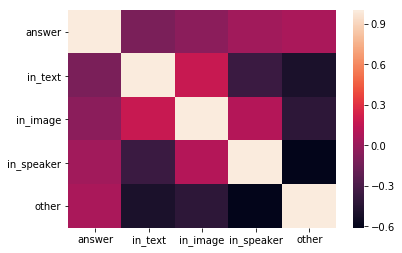

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

recall = pd.read_csv('infer.csv')
corr = recall.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

In [22]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(recall)

,answer,in_text,in_image,in_speaker,other
answer,0,0.3431,0.6973,0.763,0.5838
in_text,0.3431,0,0.1315,0.0016,0
in_image,0.6973,0.1315,0,0.3893,0.0002
in_speaker,0.763,0.0016,0.3893,0,0
other,0.5838,0,0.0002,0,0


              answer   in_text  in_image  in_speaker     other
answer      1.000000 -0.017466 -0.078860    0.089676 -0.043123
in_text    -0.017466  1.000000  0.207983   -0.288923 -0.362786
in_image   -0.078860  0.207983  1.000000   -0.118246 -0.382408
in_speaker  0.089676 -0.288923 -0.118246    1.000000 -0.714918
other      -0.043123 -0.362786 -0.382408   -0.714918  1.000000


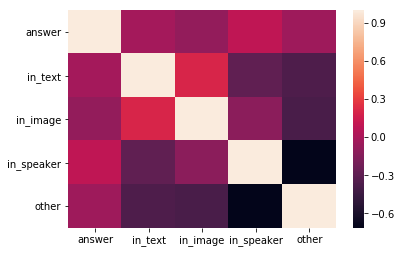

In [23]:
import seaborn as sns
%matplotlib inline

infer = pd.read_csv('recall.csv')
corr = infer.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

In [24]:
calculate_pvalues(infer)

,answer,in_text,in_image,in_speaker,other
answer,0,0.8354,0.3475,0.2851,0.6078
in_text,0.8354,0,0.0124,0.0004,0
in_image,0.3475,0.0124,0,0.1581,0
in_speaker,0.2851,0.0004,0.1581,0,0
other,0.6078,0,0,0,0
